In [1]:
import tensorflow as tf
import numpy as np

In [2]:
np.random.seed(101)
tf.set_random_seed(101)

In [3]:
rand_a = np.random.uniform(0,100,(5,5))
rand_a

array([[51.63986277, 57.06675869,  2.84742265, 17.15216562, 68.52769817],
       [83.38968626, 30.69662197, 89.36130797, 72.15438618, 18.99389542],
       [55.42275911, 35.2131954 , 18.18924027, 78.56017619, 96.54832224],
       [23.23536618,  8.35614337, 60.35484223, 72.89927573, 27.62388285],
       [68.53063288, 51.78674742,  4.84845374, 13.78692376, 18.69674261]])

In [4]:
rand_b = np.random.uniform(0,100,(5,1))
rand_b

array([[99.43179012],
       [52.06653967],
       [57.87895355],
       [73.48190583],
       [54.19617722]])

In [5]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)

In [6]:
add_op = a+b

In [7]:
mul_op = a*b

In [8]:
with tf.Session() as sess:
    add_result= sess.run(add_op, feed_dict = {a:rand_a,b:rand_b})
    mult_result = sess.run(mul_op, feed_dict = {a:rand_a,b:rand_b})

In [9]:
add_result

array([[151.07166 , 156.49855 , 102.27921 , 116.58396 , 167.95949 ],
       [135.45622 ,  82.76316 , 141.42784 , 124.22093 ,  71.06043 ],
       [113.30171 ,  93.09215 ,  76.06819 , 136.43912 , 154.42728 ],
       [ 96.71727 ,  81.83804 , 133.83675 , 146.38118 , 101.10579 ],
       [122.72681 , 105.982925,  59.044632,  67.9831  ,  72.89292 ]],
      dtype=float32)

In [10]:
mult_result

array([[5134.644  , 5674.25   ,  283.12433, 1705.4707 , 6813.8315 ],
       [4341.8125 , 1598.267  , 4652.734  , 3756.8293 ,  988.94635],
       [3207.8113 , 2038.1029 , 1052.7742 , 4546.9805 , 5588.1157 ],
       [1707.379  ,  614.02527, 4434.989  , 5356.7773 , 2029.8555 ],
       [3714.0984 , 2806.6438 ,  262.76764,  747.19855, 1013.292  ]],
      dtype=float32)

# Example Neural Network

In [11]:
n_features = 10
n_dense_neurons = 3 #Number of neurons in 1 layers

In [12]:
x = tf.placeholder(tf.float32,(None,n_features))


In [13]:
W = tf.Variable(tf.random_normal([n_features,n_dense_neurons])) #weights
b = tf.Variable(tf.ones([n_dense_neurons])) #Bias Term (order of matrix has to to taken care of as W is to multiplied by b )


In [14]:
xW = tf.matmul(x,W)

In [15]:
z = tf.add(xW,b)

In [16]:
a = tf.sigmoid(z)


In [17]:
init = tf.global_variables_initializer()


In [18]:
with tf.Session() as sess:
    sess.run(init)
    layer_out = sess.run(a,feed_dict={x:np.random.random([1,n_features])})

In [19]:
print(layer_out)

[[0.19592889 0.8423014  0.36188066]]


## Simple Regression Example

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
x_data = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)

In [22]:
x_data

array([-1.20856056, -0.08034641,  2.82674411,  4.50477294,  3.42312535,
        4.88227319,  7.18414126,  6.77068715,  9.4930023 ,  9.96290567])

In [23]:
y_label = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)

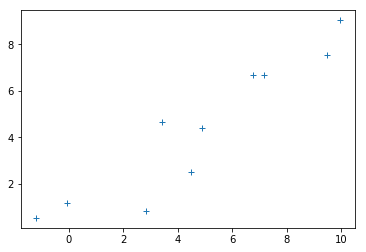

In [29]:
plt.plot(x_data,y_label,'+')

Y = mx +b

In [30]:
np.random.rand(2)

array([0.44236813, 0.87758732])

In [31]:
m = tf.Variable(0.44)
b = tf.Variable(0.87)

In [33]:
error = 0
for x,y in zip(x_data,y_label ):
    y_hat = m*x + b
    error += (y-y_hat)**2

In [37]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [38]:
init = tf.global_variables_initializer();


In [46]:
with tf.Session() as sess:
    sess.run(init)
    training_steps = 1
    for i in range(training_steps):
        sess.run(train)
    final_slope, final_intercept = sess.run([m,b])

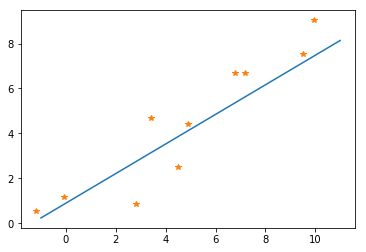

In [47]:
x_test = np.linspace(-1,11,10)
y_pred_plot = final_slope*x_test + final_intercept
plt.plot(x_test, y_pred_plot)
plt.plot(x_data, y_label,'*')